### Logistic Regression 이해하기 : 매우 중요

In [4]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [7]:
np.shape(y_data)

(6, 1)

In [8]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
 
# input = 2, output = 1 
W = tf.Variable(tf.random_normal([2,1]), name='weight')
# output = 1
b = tf.Variable(tf.random_normal([1]), name='bias')

### Hypothesis

In [9]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [10]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * (tf.log(1 - hypothesis)))
 

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
 

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

### Train !

In [11]:
sess = tf.InteractiveSession()

In [12]:
sess.run(tf.global_variables_initializer())

In [16]:
vcost =[]

In [17]:
for step in range(10001):
    cost_val,  _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
    vcost.append(cost_val)

    if step % 1000 == 0:
        print(step, '\t', cost_val)

0 	 0.14040881
1000 	 0.13116099
2000 	 0.12307004
3000 	 0.11593395
4000 	 0.109594256
5000 	 0.10392495
6000 	 0.09882543
7000 	 0.0942136
8000 	 0.090022705
9000 	 0.08619726
10000 	 0.082691416


Text(0, 0.5, 'cost')

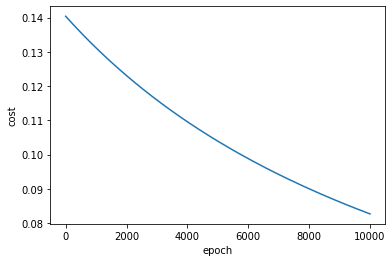

In [18]:
plt.plot(vcost)
plt.xlabel('epoch')
plt.ylabel('cost')

### Test !

In [19]:
sess.run(hypothesis,feed_dict={X:[[5,3]]} )

array([[0.97591394]], dtype=float32)

In [20]:
sess.run(predicted,feed_dict={X:[[5,3]]} )

array([[1.]], dtype=float32)

In [21]:
sess.run(hypothesis,feed_dict={X:[[4,3]]} )

array([[0.85391074]], dtype=float32)

In [22]:
sess.run(predicted,feed_dict={X:[[4,3]]} )


array([[1.]], dtype=float32)

In [23]:
sess.run(hypothesis,feed_dict={X:[[1,0.2]]} )

array([[0.00235305]], dtype=float32)